In [1]:
% matplotlib inline

import numpy as np
import numpy.ma as ma
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import seawater as sw

import MITgcmutils as mit
from MITgcmutils import cs

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})


/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# import data needed
# grid data

CRindir = '/Volumes/My Passport/coarse_run/'
HRindir = '/Volumes/My Passport/high_res/'

#import grid params for CR grid

in_file = '%sgrid/HFacC.data' % CRindir
HFCR = np.fromfile(in_file, dtype = '>f')
HFCR = HFCR.reshape(23, 160, 360)[0,:,:]

in_file = '%sgrid/XC.data' % CRindir
XC = np.fromfile(in_file, dtype = '>f')
XC = XC.reshape(160,360)

in_file = '%sgrid/YC.data' % CRindir
YC = np.fromfile(in_file, dtype = '>f')
YC = YC.reshape(160,360)

in_file = '/Users/sclayton/Documents/darwin_model/eg_grid/RA.data'
RA = np.fromfile(in_file, dtype = '>f')
RA = RA.reshape(160,360)

#import grid params for HR grid
HFHR = mit.rdmds('/Users/sclayton/Documents/darwin_model/e2_grid/hFacC')
XG = mit.rdmds('/Users/sclayton/Documents/darwin_model/e2_grid/XG')
YG = mit.rdmds('/Users/sclayton/Documents/darwin_model/e2_grid/YG')
RAC = mit.rdmds('/Users/sclayton/Documents/darwin_model/e2_grid/RAC')

In [3]:
# phyto, PP, zoo, MLD, NO3
# CR data
CR_P = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/IntPhyto.monthly.1999.data', dtype = '>f')
CR_P = CR_P.reshape(12, 160, 360)
CR_PP = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/IntPP.monthly.1999.data', dtype = '>f')
CR_PP = CR_PP.reshape(12, 160, 360)
CR_Z = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/IntZoo.monthly.1999.data', dtype = '>f')
CR_Z = CR_Z.reshape(12, 160, 360)
CR_N = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/nit.monthly.1999.data', dtype = '>f')
CR_N = CR_N.reshape(12, 160, 360)
CR_mld = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/mld.monthly.1999.data', dtype = '>f')
CR_mld = CR_mld.reshape(12, 160, 360)

In [102]:
# get monthly area weighted averages for N. Hemisphere subpolar region

lat_min = 40.
lat_max = 45.

columns = ['phyto', 'pp', 'zoo','nit','mld']

HRmonthly = pd.DataFrame(index = range(1,13,1), columns=columns)
HRmonthly.fillna(0)
CRmonthly = pd.DataFrame(index = range(1,13,1), columns=columns)
CRmonthly.fillna(0)

# conversion from mmol P to TG C
conv = (10**-12)

for m in range(1, 13, 1):
    tmp = np.zeros(5)
    
    infile = '%smonthly/intBio.monthly.1999%02d.data' % (HRindir,m)
    HR_P = np.fromfile(infile, dtype='>f').reshape(510, 3060)
    HR_P = ma.masked_where(HFHR[0,:,:] == 0, HR_P, copy=False)
    HR_P = HR_P*HFHR[0,:,:]*RAC
    tmp[0] = np.nansum(HR_P[(YG>=lat_min) & (YG<=lat_max)])*conv
    del HR_P
   
    infile = '/Users/sclayton/Google Drive/work/comparison/data/monthly/HR/intPP.monthly.1999%02d.data' % m
    HR_PP = np.fromfile(infile, dtype='>f').reshape(510, 3060)
    HR_PP = ma.masked_where(HFHR[0,:,:] == 0, HR_PP, copy=False)
    HR_PP = HR_PP*HFHR[0,:,:]*RAC
    tmp[1] = np.nansum(HR_PP[(YG>= lat_min) & (YG<= lat_max)])/365

    infile = '/Users/sclayton/Google Drive/work/comparison/data/monthly/HR/intZoo.monthly.1999%02d.data' % m
    HR_Z = np.fromfile(infile, dtype='>f').reshape(510, 3060)
    HR_Z = ma.masked_where(HFHR[0,:,:] == 0, HR_Z, copy=False)
    HR_Z = HR_Z*HFHR[0,:,:]*RAC
    tmp[2] = np.nansum(HR_Z[(YG>= lat_min) & (YG<= lat_max)])*conv

    infile = '/Users/sclayton/Google Drive/work/comparison/data/monthly/HR/SurfNutsZoo.monthly.1999%02d.data' % m
    HR_N = np.fromfile(infile, dtype='>f').reshape(21, 510, 3060)
    HR_N = HR_N[1,:,:]
    HR_N = ma.masked_where(HFHR[0,:,:] == 0, HR_N, copy=False)
    HR_N = HR_N*HFHR[0,:,:]*RAC
    tmp[3] = np.nansum(HR_N[(YG>= lat_min) & (YG<= lat_max)])/np.nansum(RAC[(YG>= lat_min) & (YG<= lat_max)])

    infile = '/Users/sclayton/Google Drive/work/comparison/data/monthly/HR/MLD.1999%02d.data' % m
    HR_MLD = np.fromfile(infile, dtype='>f').reshape(510, 3060)
    HR_MLD = ma.masked_where(HFHR[0,:,:] == 0, HR_MLD, copy=False)
    HR_MLD = HR_MLD*RAC*HFHR[0,:,:]
    tmp[4] = np.nansum(HR_MLD[(YG>= lat_min) & (YG<= lat_max)])/np.nansum(RAC[(YG>= lat_min) & (YG<= lat_max)])
#np.nanmean(HR_MLD[(YG>= lat_min) & (YG<= lat_max)])#
    HRmonthly.loc[m] = tmp
    
    
for m in range(0, 12, 1):
    tmp = np.zeros(5)
    
    CR_Px = ma.masked_where(HFCR == 0, CR_P[m,:,:], copy=False)
    CR_Px = CR_Px*HFCR*RA
    tmp[0]=np.nansum(CR_Px[(YC>=lat_min) & (YC<=lat_max)])*conv
    
    CR_PPx = ma.masked_where(HFCR == 0, CR_PP[m,:,:], copy=False)
    CR_PPx = CR_PPx*HFCR*RA
    tmp[1]=np.nansum(CR_PPx[(YC>=lat_min) & (YC<=lat_max)])/365
    
    CR_Zx = ma.masked_where(HFCR == 0, CR_Z[m,:,:], copy=False)
    CR_Zx = CR_Zx*HFCR*RA
    tmp[2]=np.nansum(CR_Zx[(YC>=lat_min) & (YC<=lat_max)])*conv
    
    CR_Nx = ma.masked_where(HFCR == 0, CR_N[m,:,:], copy=False)
    CR_Nx = CR_Nx*HFCR*RA
    tmp[3]=np.nansum(CR_Nx[(YC>=lat_min) & (YC<=lat_max)])/np.nansum(RA[(YC>= lat_min) & (YC<= lat_max)])
    
    CR_mldx = ma.masked_where(HFCR == 0, CR_mld[m,:,:], copy=False)
    CR_mldx = CR_mldx*HFCR*RA
    tmp[4]=np.nansum(CR_mldx[(YC>=lat_min) & (YC<=lat_max)])/np.nansum(RA[(YC>= lat_min) & (YC<= lat_max)])

    CRmonthly.loc[m+1] = tmp
    

In [103]:
print HRmonthly

print CRmonthly

      phyto       pp       zoo       nit      mld
1   17.1201    62295   1.54068   2.38091   75.768
2   33.3745   138235  0.991119   2.86219  90.4833
3   72.6421   285533   1.16776    2.8303  100.944
4    107.67   352347   2.73817   1.99178  40.0099
5   80.1134   243123   5.85492  0.921057   8.1505
6   60.4262   198477   8.54015   0.49321   5.9675
7   50.5314   172787   9.59384  0.340093  4.79715
8   44.4224   151756   9.23119    0.2455  5.05297
9   37.8544   126570   8.22478  0.221147  9.70546
10  30.8076   102212   6.75529  0.321791  16.8866
11  25.2988  79764.1   5.10503  0.752038  27.6213
12  18.3764  55329.7   3.14194   1.54129  48.8664
      phyto       pp      zoo       nit      mld
1   16.6822    79010  2.99821    3.1753   72.922
2   28.2188   147902  2.14128   3.64459   93.672
3   50.6339   277111  3.25075   3.71353   100.02
4   94.9673   452424  8.19661   2.90203  67.7039
5   105.472   410231  19.1691   1.36187  26.7161
6   70.6259   277843  26.8372  0.818861  11.4995
7   49.

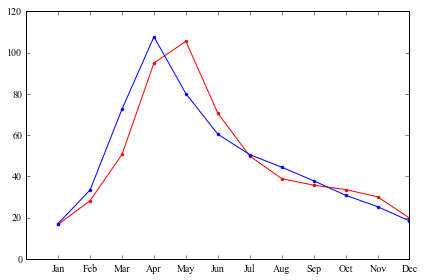

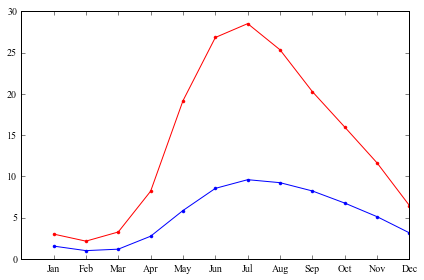

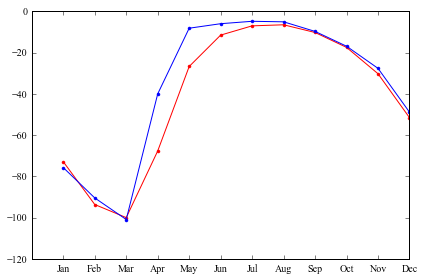

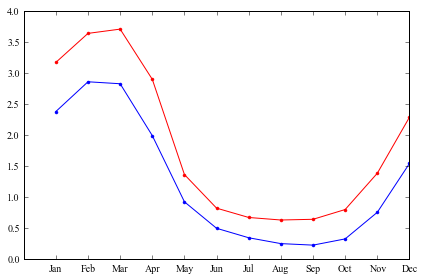

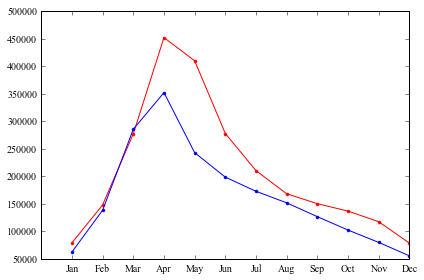

In [104]:
# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']
# plt.plot(range(1, 13, 1), CRmonthly['phyto'],'.-r', range(1, 13, 1), HRmonthly['phyto'],'.-b')
# plt.xticks(range(1, 13, 1),months)
# #plt.axis([0.5,12.5,-350,0])
# plt.show()

# plt.plot(range(1, 13, 1), CRmonthly['zoo'],'.-r', range(1, 13, 1), HRmonthly['zoo'],'.-b')
# plt.xticks(range(1, 13, 1),months)
# #plt.axis([0.5,12.5,0,5])
# plt.show()

# plt.plot(range(1, 13, 1), -CRmonthly['mld'],'.-r', range(1, 13, 1), -HRmonthly['mld'],'.-b')
# plt.xticks(range(1, 13, 1),months)
# #plt.axis([0.5,12.5,0,5])
# plt.show()

# plt.plot(range(1, 13, 1), CRmonthly['nit'],'.-r', range(1, 13, 1), HRmonthly['nit'],'.-b')
# plt.xticks(range(1, 13, 1),months)
# #plt.axis([0.5,12.5,0,5])
# plt.show()

# plt.plot(range(1, 13, 1), CRmonthly['pp'],'.-r', range(1, 13, 1), HRmonthly['pp'],'.-b')
# plt.xticks(range(1, 13, 1),months)
# #plt.axis([0.5,12.5,0,5])
# plt.show()

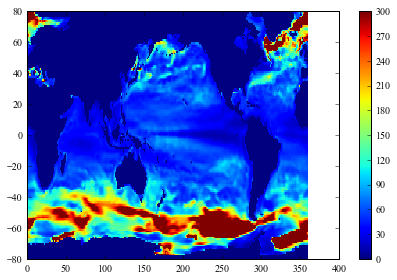

In [105]:
plt.pcolor(XC, YC, np.nanmean(CR_mld,0), shading ='flat', vmin=0, vmax=300)
plt.colorbar()
plt.show()